<a href="https://colab.research.google.com/github/WMFrts/regressao/blob/main/regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2><center>REGRESSÃO</center></h2>
<p align="Justify">É uma técnica que permite quantificar e inferir a relação de uma variável dependente (variável de resposta, objetivo) com variáveis independentes (variáveis explicativas, previsoras). A análise da regressão pode ser usada como um método descritivo da análise de dados (por exemplo, o ajustamento de curvas).</p>
<hr size="1" width="100%" align="center" noshade>




<h3><center>1 REGRESSÃO LINEAR SIMPLES</center></h3>
<p align="Justify">Inclui somente duas variáveis: uma independente e outra dependente. 
A variável dependente é aquela que está sendo explicada, 
enquanto a variável independente é aquela que é utilizada 
para explicar a variação na variável dependente.</p>


In [2]:
#biblioteca plotly para visualização de gráficos dinâmicos:

!pip install plotly --upgrade


     |████████████████████████████████| 26.5 MB 1.6 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [3]:

#plotly,seaborn e matplotlib para gerar e visualizar gráficos;
#pandas parar carregar o arquivo .csv;
#numpy para realizar os cálculos em Arrays Multidimensionais.

import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


**1.1 BASE PLANO DE SAÚDE - EXPLORAÇÃO DE DADOS** 
<p align="Justify">Base de dados ilustrativa para estudo de regressão linear simples com 10 registros. Mostra na primeira coluna a idade; já na segunda, o custo.</p>

In [18]:

#Carregamento do arquivo

base_plano_saude = pd.read_csv('plano_saude.csv')
base_plano_saude

,idade,custo
0,18,871
1,23,1132
2,28,1242
3,33,1356
4,38,1488
5,43,1638
6,48,2130
7,53,2454
8,58,3066
9,63,4090


**1.2 PERGUNTA SOBRE O CONTEXTO**
<p align="Justify">De acordo com os dados apresentados, quanto poderia custar o plano 
saúde dependendo da idade da pessoa?


Essa pergunta pode ser respondida por meio de um modelo de regressão
linear simples, pois há apenas duas variáveis: a dependente (custo) e a 
independente, previsora (idade)


In [19]:
#criação da variável x que armazenará o atributo previsor (idade)
#iloc[:,0] seleciona o conj. de registros de todas as linhas da coluna 0
#.values converte para o formato np array

x_plano_saude = base_plano_saude.iloc[:, 0].values 
x_plano_saude


array([18, 23, 28, 33, 38, 43, 48, 53, 58, 63])

In [20]:
#mesmo procedimento para a variável y dependente (custo)
y_plano_saude = base_plano_saude.iloc[:, 1].values 
y_plano_saude

array([ 871, 1132, 1242, 1356, 1488, 1638, 2130, 2454, 3066, 4090])

**1.3 COEFICIENTE DE CORRELAÇÃO**
<p align="Justify">O coeficiente de correlação de Pearson é um teste que mede a relação estatística entre duas variáveis contínuas. 

Apresenta um intervalo de valores de +1 a -1. Um valor de 0 indica que não há associação entre as duas variáveis. Um valor maior que 0 indica uma associação positiva. Isto é, à medida que o valor de uma variável aumenta, o mesmo acontece com o valor da outra variável.

In [21]:
# A correlação entre as duas variáveis é 0.93091958
# 93% do custo talvez seja explicado pela idade 

np.corrcoef(x_plano_saude, y_plano_saude)


array([[1.        , 0.93091958],
       [0.93091958, 1.        ]])

In [22]:
# Esta em forma de vetor, precisa mudar para matriz

x_plano_saude.shape

(10,)

In [23]:
# .reshape() para mudar para forma de matriz
# Então, poderá ser enviada para o algoritmo de regressão

x_plano_saude = x_plano_saude.reshape(-1,1)
x_plano_saude

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]])

In [24]:
# importação para o algoritmo
# função fit() para executar o treinamento

from sklearn.linear_model import LinearRegression
regressor_plano_saude = LinearRegression()
regressor_plano_saude.fit(x_plano_saude, y_plano_saude)


LinearRegression()

In [25]:
# y = b0 + b1.x, equação que representa o modelo
# treinamento = encontrar b0 e b1 para cada atributo

# b0 = intercept (intersecção com o eixo y)
regressor_plano_saude.intercept_

-558.9490909090912

In [13]:
# b = coeficiente (inclinação da reta)
regressor_plano_saude.coef_

array([61.86787879])

In [14]:
# método predict para descobrir a associação 
# x_plano_saude está relacionado as idades

previsoes = regressor_plano_saude.predict(x_plano_saude)
previsoes

array([ 554.67272727,  864.01212121, 1173.35151515, 1482.69090909,
       1792.03030303, 2101.36969697, 2410.70909091, 2720.04848485,
       3029.38787879, 3338.72727273])

In [ ]:
# gráfico de dispersão para visualizar o resultado
grafico = px.scatter(x = x_plano_saude, y= y_plano_saude)
grafico.show()

In [15]:
# antes, x_plano_saude está em formato de matriz 

x_plano_saude

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]])

In [16]:
# para fazer o gráfico, precisa retornar para o formato de vetor
# para isso, utiliza a função .ravel do np

x_plano_saude.ravel()

array([18, 23, 28, 33, 38, 43, 48, 53, 58, 63])

In [17]:
# Novamente,  o código para mostrar o gráfico
# Aqui, mostra apenas os pontos idade e custo

grafico = px.scatter(x = x_plano_saude.ravel(), y= y_plano_saude)
grafico.show()

In [18]:
# Agora, com as previsões do algoritmo
# acrescentam-se as previsões com a função .add_scatter

grafico = px.scatter(x = x_plano_saude.ravel(), y= y_plano_saude)
grafico.add_scatter(x = x_plano_saude.ravel(), y= previsoes, name = 'Regressão')
grafico.show()

In [19]:
# para saber a qualidade do algoritmo
regressor_plano_saude.score(x_plano_saude, y_plano_saude)

0.8666112727879174

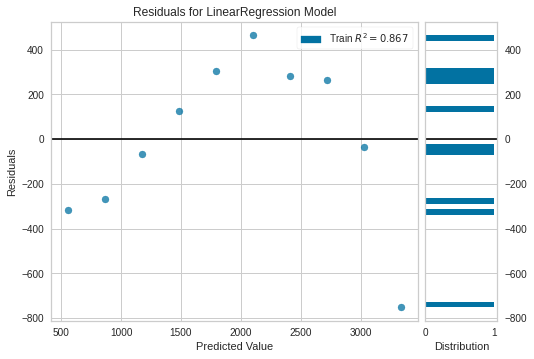

In [20]:
# para saber a distância dos valores reais em relção à regressão linear
# Train R² = 0.867 indica a qualidade do algoritmo

from yellowbrick.regressor import ResidualsPlot
visualizador = ResidualsPlot(regressor_plano_saude)
visualizador.fit(x_plano_saude, y_plano_saude)
visualizador.poof()


**1.4 BASE PREÇO DAS CASAS - EXPLORAÇÃO DE DADOS**


In [44]:
base_casas = pd.read_csv('house_prices.csv')
base_casas

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [45]:
base_casas.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [46]:
# há valores faltantes? Quantos seriam?
base_casas.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [47]:
# indicação das correlações 

base_casas.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


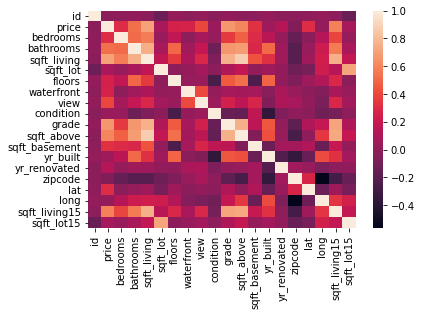

In [48]:
# com sns é possível visualizar "melhor" a correlação

sns.heatmap(base_casas.corr());

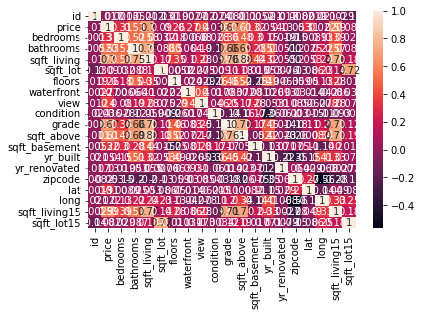

In [49]:
# Agora com os valores:
# "Ninguém quer fazer um gráfico ruim. Mas acontece" - Storytelling Com Dados

sns.heatmap(base_casas.corr(), annot= True);

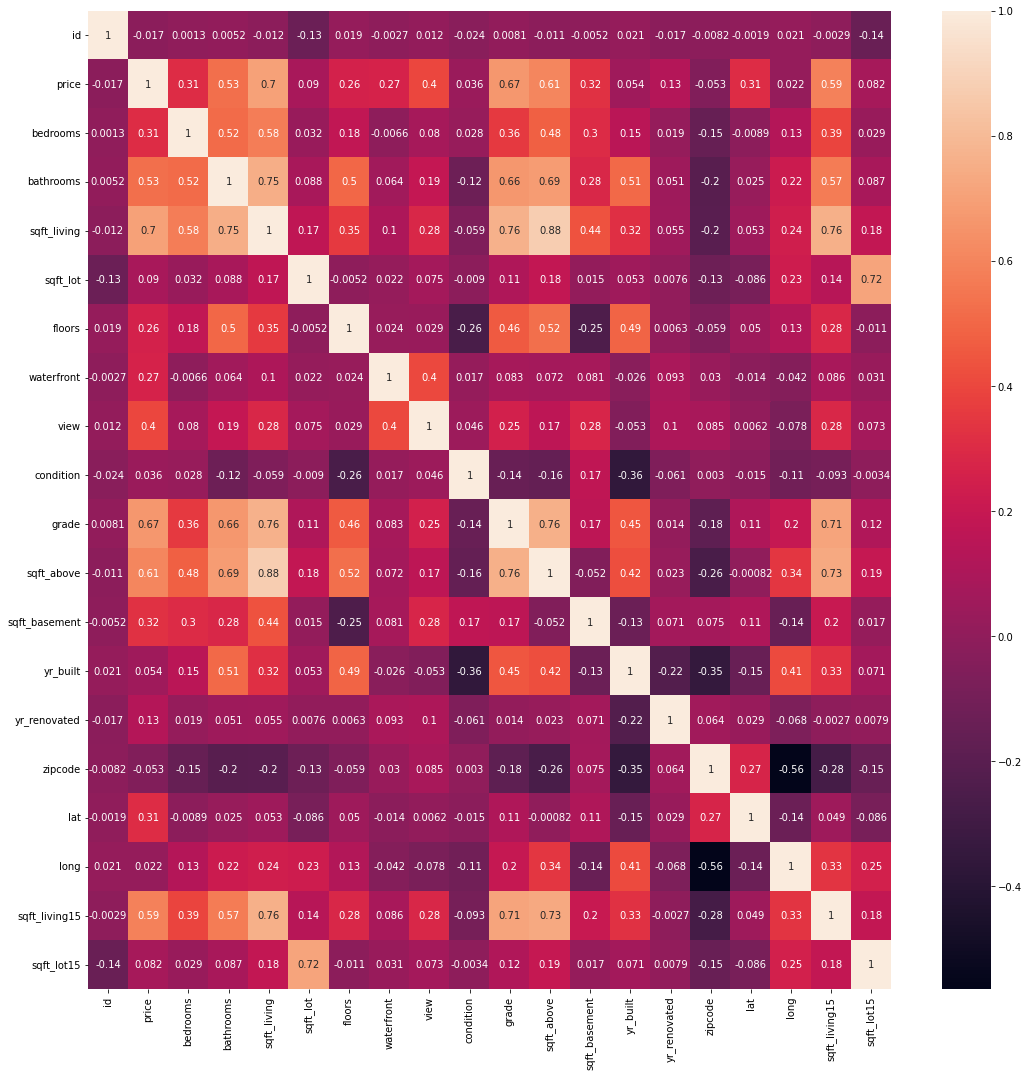

In [50]:
# aumentar o tamanho da figura:
# criação da variável e utilização do plt
# passagem do tamanho para figure

figura = plt.figure(figsize = (18, 18))
sns.heatmap(base_casas.corr(), annot= True);

**1.5 PERGUNTA SOBRE O CONTEXTO**
<p align="Justify">De acordo com os dados apresentados, baseado na metragem, qual seria o preço da casa?


A regressão linear simples também pode dar a resposta. Nesse caso, a variável x é o previsor, e a variável y está relacionada com o preço da casa

In [51]:
# metragem da casa

x_casas = base_casas.iloc[:, 5:6].values
x_casas

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]])

In [52]:
y_casas = base_casas.iloc[:,2].values
y_casas

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [53]:
# divisão da base de dados entre treinamento e teste
# "teste_size = 0.3" indica que 30% da base será para teste,
# logo, 70% da base será para treinar

import sklearn as sk

from sklearn.model_selection import train_test_split
x_casas_treinamento, x_casas_teste, y_casas_treinamento, y_casas_teste = train_test_split(x_casas, y_casas, test_size = 0.3, random_state = 0)

In [54]:
# o treinamento irá acontecer com 15129 registros

x_casas_treinamento.shape, y_casas_treinamento.shape

((15129, 1), (15129,))

In [55]:
# o teste do algoritmo será feito com 6484 registros

x_casas_teste.shape, y_casas_teste.shape

((6484, 1), (6484,))

**1.6 CRIAÇÃO DO MODELO DE REGRESSÃO LINEAR**

In [56]:
from sklearn.linear_model import LinearRegression
regressor_simples_casa = LinearRegression()
regressor_simples_casa.fit(x_casas_treinamento, y_casas_treinamento)

LinearRegression()

In [57]:
# b0

regressor_simples_casa.intercept_

-37893.59850106726

In [58]:
# b1

regressor_simples_casa.coef_

array([278.32860644])

In [59]:
# avaliação de desempenho na própria base de treinamento
# um bom desempenho, deve ser próximo de 1

regressor_simples_casa.score(x_casas_treinamento, y_casas_treinamento)

0.49453356717789776

In [60]:
# mais um baixo desempenho do algoritmo

regressor_simples_casa.score(x_casas_teste, y_casas_teste)

0.48889929019453027

In [61]:
# geração de previsões para o treinamento

previsoes = regressor_simples_casa.predict(x_casas_treinamento)
previsoes

array([348983.16445268, 365682.88083917, 758126.21592175, ...,
       618961.91270098, 621745.1987654 , 624528.48482981])

In [62]:
# x_casas_treinamento.ravel() para transformar o vetor em matriz
# o gráfico retorna a previsão para cada registro da base de dados de treinamento

grafico = px.scatter(x = x_casas_treinamento.ravel(), y = previsoes)
grafico 

In [65]:
# Novo gráfico com todos os dados:
# no eixo y serão passados os dados reais: y = y_casas_treinamento
# Voltar na importação de bibliotecas para "import plotly.graph_objects as go"

grafico1 = px.scatter(x = x_casas_treinamento.ravel(), y = y_casas_treinamento)

grafico3 = go.Figure(data = grafico1.data)   #gera dois gráficos e faz a combinação 
grafico3

In [66]:
# concatenação com as previsões

grafico1 = px.scatter(x = x_casas_treinamento.ravel(), y = y_casas_treinamento)
grafico2 = px.line(x = x_casas_treinamento.ravel(), y = previsoes )   #gráfico de linha
grafico3 = go.Figure(data = grafico1.data + grafico2.data)   #concatenação
grafico3

In [67]:
grafico1 = px.scatter(x = x_casas_treinamento.ravel(), y = y_casas_treinamento)   #em azul
grafico2 = px.line(x = x_casas_treinamento.ravel(), y = previsoes )   #gráfico de linha
grafico2.data[0].line.color = 'black'   #previsões em preto
grafico3 = go.Figure(data = grafico1.data + grafico2.data)   #concatenação
grafico3

**1.7 MÉTRICAS DE AVALIAÇÃO**

<ul>
<li>Mean Squared Error (MSE): calcula a média dos erros do modelo ao quadrado - diferenças menores recebem menos peso que as maiores. </li>

<li>Root Mean Squared Error (RMSE): é a raiz quadrada do MSE. O erro volta a ter as unidades de medida originais da variável dependente.</li>

<li>Mean Absolute Error (MAE): diferença absoluta entre as previsões eos valores reais - atribui o mesmo peso a todas as diferenças, de maneira linear.</li>

<li>Mean Absolute Percentage Error (MAPE): calcula a média percentual do desvio absoluto entre as previsões e a realidade. </li>
</ul>

In [68]:
# previsões para cada uma das casas do banco de dados

previsoes_teste = regressor_simples_casa.predict(x_casas_teste)
previsoes_teste

array([ 360116.30871034, 1261900.99358095,  362899.59477476, ...,
        560512.90534826,  374032.73903242,  329500.16200177])

In [69]:
# é necessário fazer o comparativo com a variável que apresenta os valores reais
# para a primeira casa, o valor é 297000 e o algoritmo previu 360116...

y_casas_teste

array([ 297000., 1578000.,  562100., ...,  380000.,  268000.,  206000.])

In [70]:
# valor absoluto da diferença entre o preço real e a previsão

abs(y_casas_teste - previsoes_teste)


array([ 63116.30871034, 316099.00641905, 199200.40522524, ...,
       180512.90534826, 106032.73903242, 123500.16200177])

In [71]:
# Mean Absolute Error (MAE):
# Em média erra 172604 para mais ou para menos no preço das casas

abs(y_casas_teste - previsoes_teste).mean()

172604.1288999542

In [72]:
# Mean Absolute Error (MAE) e
# Mean Squared Error (MSE) com sklearn

from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(y_casas_teste, previsoes_teste), mean_squared_error(y_casas_teste, previsoes_teste)

(172604.1288999542, 70170013932.1159)

In [73]:
# Mean Absolute Percentage Error (MAPE)

from sklearn.metrics import  mean_absolute_percentage_error
mean_absolute_percentage_error(y_casas_teste, previsoes_teste)


0.3582822304259969

In [74]:
# Root Mean Squared Error (RMSE): 

np.sqrt(mean_squared_error(y_casas_teste, previsoes_teste))

264896.23238565685

In [75]:
# geração do gráfico considerando a base de dados do teste
# para visualizar se haverá algum tipo de diferença

grafico1 = px.scatter(x = x_casas_teste.ravel(), y = y_casas_teste)   #em azul
grafico2 = px.line(x = x_casas_teste.ravel(), y = previsoes_teste )   #gráfico de linha
grafico2.data[0].line.color = 'black'   #previsões em preto
grafico3 = go.Figure(data = grafico1.data + grafico2.data)   #concatenação
grafico3



<h3><center>2 REGRESSÃO LINEAR MÚLTIPLA</center></h3>

<p align="Justify">É um modelo de análise que usamos quando modelamos a relação linear entre uma variável de desfecho contínua e múltiplas variáveis preditoras que podem ser contínuas ou categóricas.

In [76]:
base_casas

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [77]:
# criação de variável

x_casas = base_casas.iloc[:,3:19].values
x_casas

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03, ...,  9.81780e+04,
         4.75112e+01, -1.22257e+02],
       [ 3.00000e+00,  2.25000e+00,  2.57000e+03, ...,  9.81250e+04,
         4.77210e+01, -1.22319e+02],
       [ 2.00000e+00,  1.00000e+00,  7.70000e+02, ...,  9.80280e+04,
         4.77379e+01, -1.22233e+02],
       ...,
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ...,  9.81440e+04,
         4.75944e+01, -1.22299e+02],
       [ 3.00000e+00,  2.50000e+00,  1.60000e+03, ...,  9.80270e+04,
         4.75345e+01, -1.22069e+02],
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ...,  9.81440e+04,
         4.75941e+01, -1.22299e+02]])

In [78]:
y_casas = base_casas.iloc[:, 2].values
y_casas

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [79]:
# divisão da base entre treinamento e teste:

from sklearn.model_selection import train_test_split
x_casas_treinamento, x_casas_teste, y_casas_treinamento, y_casas_teste = train_test_split(x_casas, y_casas, test_size = 0.3, random_state = 0)


In [80]:
# criação do regressor e treinamento

regressor_multiplo_casas = LinearRegression()
regressor_multiplo_casas.fit(x_casas_treinamento, y_casas_treinamento)

LinearRegression()

In [81]:
# b0:

regressor_multiplo_casas.intercept_

5736222.7033961015

In [82]:
regressor_multiplo_casas.coef_

array([-3.08423090e+04,  3.66540816e+04,  1.12179159e+02,  8.00604119e-03,
        9.60355724e+03,  5.85441638e+05,  5.60621840e+04,  2.54795004e+04,
        1.01092121e+05,  6.96565321e+01,  4.25226266e+01, -2.60724691e+03,
        1.40070753e+01, -5.53557431e+02,  6.11778251e+05, -1.95564688e+05])

In [83]:
# b1, b2, ...b16:
# Nesse caso, y = b0 + b1.x1 + b2.x2...+b16.x16

len(regressor_multiplo_casas.coef_)

16

In [84]:
# para a regressão linear simples foi de 0.40

regressor_multiplo_casas.score(x_casas_treinamento, y_casas_treinamento)

0.7029888085955007

In [85]:
# agora na base de dados de teste

regressor_multiplo_casas.score(x_casas_teste, y_casas_teste)

0.6885414149062775

In [86]:
previsoes = regressor_multiplo_casas.predict(x_casas_teste)
previsoes

array([ 383751.77768704, 1514216.1751743 ,  546921.96179117, ...,
        314968.57623301,  219405.55573561,  148128.83467045])

In [87]:
# precisa ser comparado com y_casas_teste

y_casas_teste

array([ 297000., 1578000.,  562100., ...,  380000.,  268000.,  206000.])

In [88]:
# Mean Absolute Error (MAE) com sklearn

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_casas_teste, previsoes)

123888.44377485772

<h3><center>3 REGRESSÃO POLINOMIAL</center></h3>

<p align="Justify">A regressão polinomial é um caso particular de regressão linear múltipla. É utilizadA quando a função que relaciona a variável resposta y com as explicativas x1, x2, ..., xn é uma curva, então representada por um polinômio.

**3.1 BANCO PLANO DE SAÚDE 2 - EXPLORAÇÃO DE DADOS**
<p align="Justify">De acordo com os dados apresentados, quanto poderia custar o plano saúde dependendo da idade da pessoa?

In [106]:
# carregamento do arquivo

base_plano_saude2 = pd.read_csv('plano_saude2.csv')
base_plano_saude2


,idade,custo
0,18,470
1,23,520
2,28,630
3,33,830
4,38,1150
5,43,1530
6,48,2040
7,53,3080
8,58,5100
9,63,10100


In [107]:
# criação variável x com o atributo previsor (idade)
# criação variável y com a resposta esperada (custo)
# .iloc[:,0:1] todos os registros coluna 0 até a 1 (busca a coluna 0)
# .values transforma no formato np array

x_plano_saude2 = base_plano_saude2.iloc[:,0:1].values
y_plano_saude2 = base_plano_saude2.iloc[:,1].values

In [108]:
# verificação

x_plano_saude2, y_plano_saude2

(array([[18],
        [23],
        [28],
        [33],
        [38],
        [43],
        [48],
        [53],
        [58],
        [63]]),
 array([  470,   520,   630,   830,  1150,  1530,  2040,  3080,  5100,
        10100]))

In [109]:
# percebe-se que a distribuição dessa base é uma curva

graf = px.scatter(x = x_plano_saude2.ravel(), y = y_plano_saude2)
graf

**3.2 CRIAÇÃO DO MODELO DE REGRESSÃO POLINOMIAL**

In [10]:
# transformações por conta da classe PolynomialFeatures
# criação de variável com o objeto de mesma classe
# degree indica a potência que será escolhida

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
x_plano_saude2_poly = poly.fit_transform(x_plano_saude2)


In [11]:
# 10 registros e 3 colunas

x_plano_saude2_poly.shape

(10, 3)

In [111]:
# **Explicação sobre a matriz**
# linha: [1.000e+00, 1.800e+01, 3.240e+02]
# 1.000e+00 padrão da classe PolynomialFeatures para o primeiro elemento
# 1.800e+01 idade 18, era esse valor na base
# 3.240e+02 idade 18²

x_plano_saude2_poly

array([[1.0000000e+00, 1.8000000e+01, 3.2400000e+02, 5.8320000e+03,
        1.0497600e+05],
       [1.0000000e+00, 2.3000000e+01, 5.2900000e+02, 1.2167000e+04,
        2.7984100e+05],
       [1.0000000e+00, 2.8000000e+01, 7.8400000e+02, 2.1952000e+04,
        6.1465600e+05],
       [1.0000000e+00, 3.3000000e+01, 1.0890000e+03, 3.5937000e+04,
        1.1859210e+06],
       [1.0000000e+00, 3.8000000e+01, 1.4440000e+03, 5.4872000e+04,
        2.0851360e+06],
       [1.0000000e+00, 4.3000000e+01, 1.8490000e+03, 7.9507000e+04,
        3.4188010e+06],
       [1.0000000e+00, 4.8000000e+01, 2.3040000e+03, 1.1059200e+05,
        5.3084160e+06],
       [1.0000000e+00, 5.3000000e+01, 2.8090000e+03, 1.4887700e+05,
        7.8904810e+06],
       [1.0000000e+00, 5.8000000e+01, 3.3640000e+03, 1.9511200e+05,
        1.1316496e+07],
       [1.0000000e+00, 6.3000000e+01, 3.9690000e+03, 2.5004700e+05,
        1.5752961e+07]])

In [112]:
# com degree = 4
# esses dados serão enviados para o algoritmo

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 4)
x_plano_saude2_poly = poly.fit_transform(x_plano_saude2)


In [113]:
# aplica o mesmo algoritmo da regressão linear

regressor_saude_polinomial = LinearRegression()
regressor_saude_polinomial.fit(x_plano_saude2_poly, y_plano_saude2)   # treinamento

LinearRegression()

In [114]:
# b0

regressor_saude_polinomial.intercept_

16561.97463791195

In [115]:
# bn

regressor_saude_polinomial.coef_

array([ 0.00000000e+00, -2.12242253e+03,  9.90404199e+01, -1.95058276e+00,
        1.40792541e-02])

**3.3 TESTE DO ALGORITMO**
<p align = Qual seria o custo do plano de saúde de acordo com a idade?

<p align="Justify">De acordo com o algoritmo de regressão polinomial, o custo do plano de saúde em relação à idade seria:

In [116]:
# caso: pessoa de 40 anos 

novo = [[40]]   # matriz para novo registro ao algoritmo

novo = poly.transform(novo)   # mesmo processo feito para o banco de dados
novo

array([[1.00e+00, 4.00e+01, 1.60e+03, 6.40e+04, 2.56e+06]])

In [117]:
# o custo do plano de saúde para uma pessoa de 40 anos seria: R$1335,33

regressor_saude_polinomial.predict(novo)

array([1335.33958015])

**3.4 PREVISÕES**

In [118]:
# previsões de custo para as idades existentes no banco de dados

previsoes = regressor_saude_polinomial.predict(x_plano_saude2_poly)
previsoes

array([ 549.65035464,  345.85081575,  616.53845992,  975.8391595 ,
       1249.06759853, 1472.7272727 , 1894.51048941, 2973.2983677 ,
       5379.16083828, 9993.35664357])

In [119]:
grafico = px.scatter(x = x_plano_saude2 [:,0], y= y_plano_saude2)
grafico.add_scatter(x = x_plano_saude2[:,0], y= previsoes, name = 'Regressão')
grafico.show()

In [42]:
# teste

'''
grafico1 = px.scatter(x = x_casas_teste.ravel(), y = y_casas_teste)   #em azul
grafico2 = px.line(x = x_casas_teste.ravel(), y = previsoes_teste )   #gráfico de linha
grafico2.data[0].line.color = 'black'   #previsões em preto
grafico3 = go.Figure(data = grafico1.data + grafico2.data)   #concatenação
grafico3
'''

graficoA = px.scatter(x = x_plano_saude2 [:,0], y= y_plano_saude2)   #em azul
graficoB = px.line(x = x_plano_saude2 [:,0], y = previsoes)   #gráfico de linha
graficoB.data[0].line.color = 'black'   #previsões em preto
graficoC = go.Figure(data = graficoA.data + graficoB.data)   #concatenação
graficoC.show()


'''
grafico = px.scatter(x = x_plano_saude2 [:,0], y= y_plano_saude2)
grafico.add_scatter(x = x_plano_saude2[:,0], y= previsoes, name = 'Regressão')
grafico.show()
'''

"\ngrafico = px.scatter(x = x_plano_saude2 [:,0], y= y_plano_saude2)\ngrafico.add_scatter(x = x_plano_saude2[:,0], y= previsoes, name = 'Regressão')\ngrafico.show()\n"

**3.5 BASE PREÇO DAS CASAS**


In [91]:
# divisão da base em treinamento e teste
# essa divisão já foi feita para esses dados

x_casas_treinamento.shape, x_casas_teste.shape

((15129, 16), (6484, 16))

**3.6 CRIAÇÃO DO MODELO DE REGRESSÃO POLINOMIAL**

In [92]:
from sklearn. preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
x_casas_treinamento_poly = poly.fit_transform(x_casas_treinamento)   # fit_transform para ajuste inicial
x_casas_teste_poly = poly.transform(x_casas_teste)   # só precisa chamar a função transform                                    


In [93]:
# eram 16 colunas: ((15129, 16), (6484, 16))
# agora são 153: ((15129, 153), (6484, 153))

x_casas_treinamento_poly.shape, x_casas_teste_poly.shape

((15129, 153), (6484, 153))

In [94]:
# criação do regressor
# seguida do treinamento
# y_casas_treinamento é para prever, então não passou por transformação

regressor_casas_poly = LinearRegression()
regressor_casas_poly.fit(x_casas_treinamento_poly, y_casas_treinamento)


LinearRegression()

In [95]:
# score na base de treinamento

regressor_casas_poly.score(x_casas_treinamento_poly, y_casas_treinamento)

0.817937209116416

In [96]:
# score na base de teste

regressor_casas_poly.score(x_casas_teste_poly, y_casas_teste)

0.8153249436575213

In [97]:
# previsões dos preços

previsoes = regressor_casas_poly.predict(x_casas_teste_poly)
previsoes

array([ 386279.00622559, 1991142.84359741,  579098.07328033, ...,
        432859.80838776,  234193.23797607,  123839.61456299])

In [98]:
# respostas reais para comparar com as previsões
# o algoritmo previu 386279, quando o valor real é 297000
y_casas_teste

array([ 297000., 1578000.,  562100., ...,  380000.,  268000.,  206000.])

**3.7 MÉTRICAS DE AVALIAÇÃO**


In [100]:
# Mean Absolute Error (MAE)

mean_absolute_error(y_casas_teste, previsoes)


101225.53413948139

In [101]:
# Mean Squared Error (MSE)

mean_squared_error(y_casas_teste, previsoes)

25354398903.88377

In [103]:
# Mean Absolute Percentage Error (MAPE)

mean_absolute_percentage_error(y_casas_teste, previsoes)

0.2063132403819746

<h3><center>4 REGRESSÃO COM ÁRVORES DE DECISÃO</center></h3>

**4.1 BASE PLANO DE SAÚDE**


In [123]:
x_plano_saude2

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]])

In [124]:
y_plano_saude2

array([  470,   520,   630,   830,  1150,  1530,  2040,  3080,  5100,
       10100])

In [125]:
# criação da árvore de decisão para regressão
# seguida de treinamento

from sklearn.tree import DecisionTreeRegressor
regressor_arvore_saude = DecisionTreeRegressor()
regressor_arvore_saude.fit(x_plano_saude2, y_plano_saude2)

DecisionTreeRegressor()

In [126]:
previsoes = regressor_arvore_saude.predict(x_plano_saude2)
previsoes

array([  470.,   520.,   630.,   830.,  1150.,  1530.,  2040.,  3080.,
        5100., 10100.])

In [127]:
# o score resultou em 1 devido aos splits

regressor_arvore_saude.score(x_plano_saude2, y_plano_saude2)

1.0

In [128]:
# Os dados foram divididos na árvore (splits) e resultaram nos valores exatos

grafico = px.scatter(x = x_plano_saude2.ravel(), y= y_plano_saude2)
grafico.add_scatter(x = x_plano_saude2.ravel(), y= previsoes, name = 'Regressão')
grafico.show()

In [133]:
# para visualizar os splits:

# A função arange cria um arranjo 
# contendo uma sequência de valores especificados em um intervalo com início e fim dados
# step: Este argumento indica o intervalo entre cada elemento do arranjo
# será utilizado step = 0.1 (pode ser tipo float e o padrão é 1)

x_teste_arvore = np.arange(min(x_plano_saude2), max(x_plano_saude2), 0.1)
x_teste_arvore

array([18. , 18.1, 18.2, 18.3, 18.4, 18.5, 18.6, 18.7, 18.8, 18.9, 19. ,
       19.1, 19.2, 19.3, 19.4, 19.5, 19.6, 19.7, 19.8, 19.9, 20. , 20.1,
       20.2, 20.3, 20.4, 20.5, 20.6, 20.7, 20.8, 20.9, 21. , 21.1, 21.2,
       21.3, 21.4, 21.5, 21.6, 21.7, 21.8, 21.9, 22. , 22.1, 22.2, 22.3,
       22.4, 22.5, 22.6, 22.7, 22.8, 22.9, 23. , 23.1, 23.2, 23.3, 23.4,
       23.5, 23.6, 23.7, 23.8, 23.9, 24. , 24.1, 24.2, 24.3, 24.4, 24.5,
       24.6, 24.7, 24.8, 24.9, 25. , 25.1, 25.2, 25.3, 25.4, 25.5, 25.6,
       25.7, 25.8, 25.9, 26. , 26.1, 26.2, 26.3, 26.4, 26.5, 26.6, 26.7,
       26.8, 26.9, 27. , 27.1, 27.2, 27.3, 27.4, 27.5, 27.6, 27.7, 27.8,
       27.9, 28. , 28.1, 28.2, 28.3, 28.4, 28.5, 28.6, 28.7, 28.8, 28.9,
       29. , 29.1, 29.2, 29.3, 29.4, 29.5, 29.6, 29.7, 29.8, 29.9, 30. ,
       30.1, 30.2, 30.3, 30.4, 30.5, 30.6, 30.7, 30.8, 30.9, 31. , 31.1,
       31.2, 31.3, 31.4, 31.5, 31.6, 31.7, 31.8, 31.9, 32. , 32.1, 32.2,
       32.3, 32.4, 32.5, 32.6, 32.7, 32.8, 32.9, 33

In [134]:
x_teste_arvore.shape

(450,)

In [135]:
# conversão para matriz

x_teste_arvore = x_teste_arvore.reshape(-1, 1)

In [136]:
x_teste_arvore.shape

(450, 1)

In [137]:
# divisões dos dados mais visíveis para perceber os splits

# ex: pessoas de 18 a 20 anos, neste split, serão relacionadas com o custo de R$470

grafico = px.scatter(x = x_plano_saude2.ravel(), y= y_plano_saude2)
grafico.add_scatter(x = x_teste_arvore.ravel(), y= regressor_arvore_saude.predict(x_teste_arvore), name = 'Regressão')
grafico.show()

**4.2 BASE PREÇO DAS CASAS**

In [143]:
# retomando os dados que já estão no banco

x_casas_treinamento.shape

(15129, 16)

In [144]:
y_casas_treinamento.shape

(15129,)

In [146]:
x_casas_teste.shape

(6484, 16)

**4.3 CRIAÇÃO DA REGRESSÃO COM ÁRVORES DE DECISÃO**

In [148]:
# criação da regressão
# treinamento com os atributos previsores(x) e objetivo(y)

regressor_arvore_casas = DecisionTreeRegressor() 
regressor_arvore_casas.fit(x_casas_treinamento, y_casas_treinamento)

DecisionTreeRegressor()

In [149]:
# score na base de dados de treinamento

regressor_arvore_casas.score(x_casas_treinamento, y_casas_treinamento)

0.9992712177726063

In [150]:
# score na base de dados de teste (que serve para a avaliação)

regressor_arvore_casas.score(x_casas_teste, y_casas_teste)

0.7292240840754057

In [154]:
previsoes = regressor_arvore_casas.predict(x_casas_teste)
previsoes

array([ 288000., 1980000.,  480000., ...,  289000.,  215000.,  218000.])

In [155]:
y_casas_teste

array([ 297000., 1578000.,  562100., ...,  380000.,  268000.,  206000.])

In [156]:
# Mean Absolute Error (MAE)

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_casas_teste, previsoes)

99693.18854102406

<h3><center>5 REGRESSÃO COM RANDOM FOREST</center></h3>